In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
from fenics import *
from mshr import *
import numpy as np
from dotenv import load_dotenv
import os

# Cargar las variables del archivo .env
load_dotenv()

True

In [2]:
os.chdir(os.getenv('TEST_DIRECTORY'))
save_images = os.getenv('SAVE_IMAGES')

In [3]:
save_images

'Y'

In [4]:
def plot_fft(dft_field_c, dft_field_s, dft_field_i, t, save_images, block): 

    dft_field_c = np.loadtxt(dft_field_c, float)
    dft_field_c[dft_field_c == 0.0] = np.nan
    dft_field_s = np.loadtxt(dft_field_s, float)
    dft_field_s[dft_field_s == 0.0] = np.nan
    dft_field_i = np.loadtxt(dft_field_i, float)
    dft_field_i[dft_field_i == 0.0] = np.nan   
    
    plt.figure(figsize=(15, 8))
    
    plt.subplot(1, 3, 1)
    img1 = plt.imshow(dft_field_c, cmap='seismic', interpolation='bilinear')
    plt.title("$fft_c(t={})$".format("{:.3f}".format(t)))
    plt.colorbar(img1, fraction=0.046, pad=0.04)  # Ajusta fraction y pad
    
    plt.subplot(1, 3, 2)
    img2 = plt.imshow(dft_field_s, cmap='seismic', interpolation='bilinear')
    plt.title("$fft_s(t={})$".format("{:.3f}".format(t)))
    plt.colorbar(img2, fraction=0.046, pad=0.04)  # Ajusta fraction y pad
    
    plt.subplot(1, 3, 3)
    img3 = plt.imshow(dft_field_i, cmap='seismic', interpolation='bilinear')
    plt.title("$fft_i(t={})$".format("{:.3f}".format(t)))
    plt.colorbar(img3, fraction=0.046, pad=0.04)  # Ajusta fraction y pad
    
    if save_images == 'Y':
        plt.savefig(f'FFT_block_{block}_step_{t:.3f}.png')
        #plt.show()
        pass
    else:
        #plt.show()
        pass

In [5]:
def dft_mean(field, end_step, end_blocks, dt):
    while dt <= end_step:
        final_file = 0.0
        for nb in range(1, end_blocks+1):
            file_name = "matrix_" + field +  "_dft_" + "{:.3f}".format(dt) + "_nb_" + str(nb) + ".txt"
            file_load = np.loadtxt(file_name, float)
            final_file += file_load
        final_file = final_file/float(end_blocks)
        #print("step=",step)
        
        f_save = "FFT_" + field + "_" + "{:.3f}".format(dt) + ".txt"
        np.savetxt(f_save, final_file, delimiter="\t")
        dt += dt
        
        
    plt.imshow(final_file, cmap=plt.cm.seismic)
    plt.title(f'Mean_fft_s(t={t:.3f})')
    plt.colorbar()
    if save_images == 'Y':
        plt.savefig(f'mean_fft_block_{block}_step_{t:.3f}.png')
        #plt.show()
        pass
    else:
        #plt.show()
        pass

In [6]:
# Define time parameters
T = float(os.getenv('T'))
dt = float(os.getenv('dt'))
nb = int(os.getenv('nb'))

In [7]:
def power_spectrum(field_type, t, block):
    field_file = "matrix_"  + field_type +"_"+ "{:.3f}".format(t) + "_" + "nb_" + str(block) + ".txt"
    field=np.loadtxt(field_file,float)
    field = np.rot90(field, k=1, axes=(0, 1))
    fft_field = np.fft.fft2(field)
    fft_field=np.fft.fftshift(fft_field)
    fft_field=(np.abs(fft_field))
    max_fft = np.where(fft_field == fft_field.max())
    fft_field[max_fft[0][0],max_fft[1][0]] = 0
    dft_file = "matrix" + "_{}_dft_".format(field_type) + "{:.3f}".format(t) + "_" + "nb_" + str(block) + ".txt"
    np.savetxt(dft_file, fft_field, delimiter="\t")
    return field_file, dft_file

block= 1


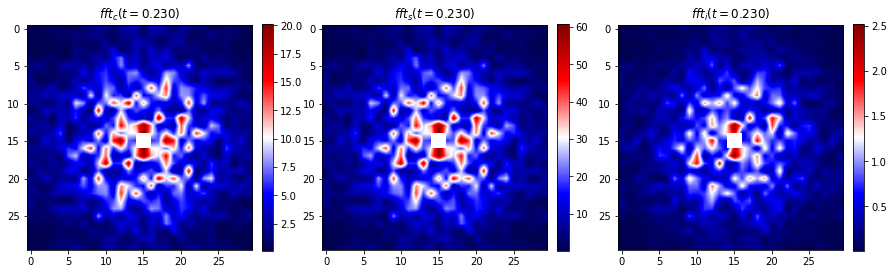

block= 2


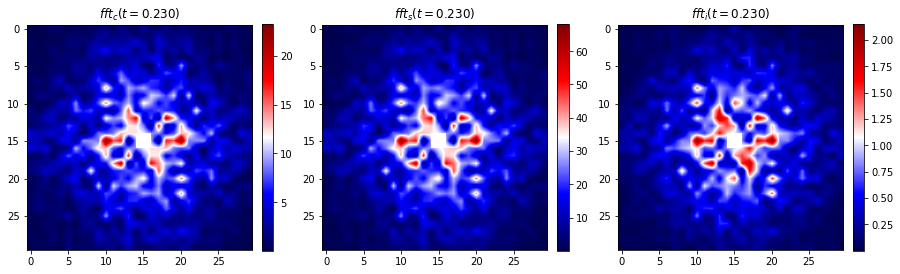

block= 3


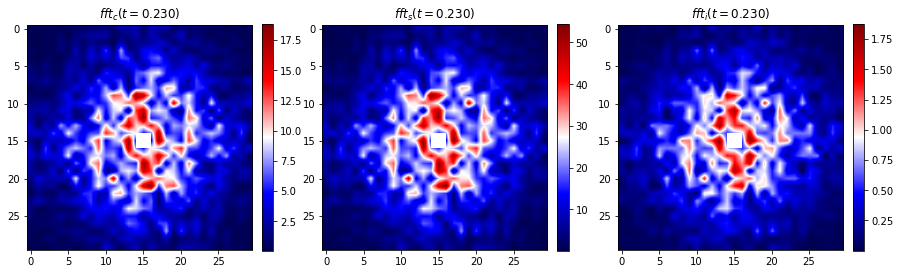

block= 4


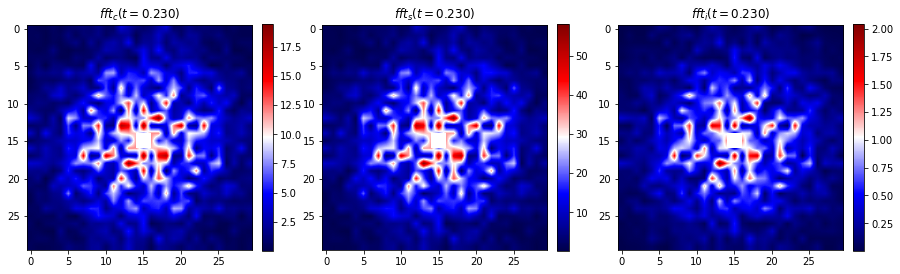

block= 5


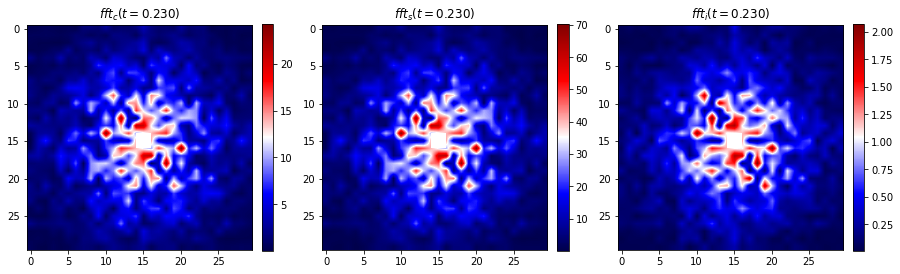

block= 6


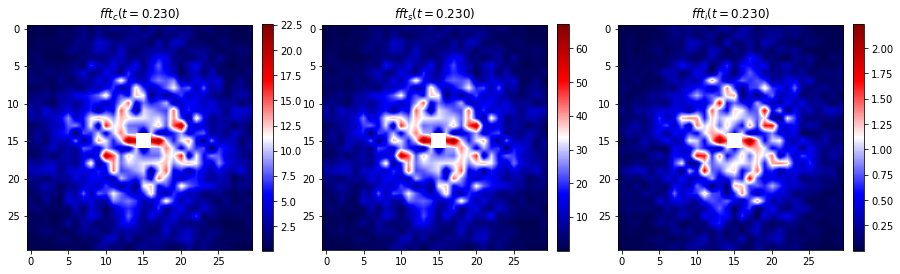

block= 7


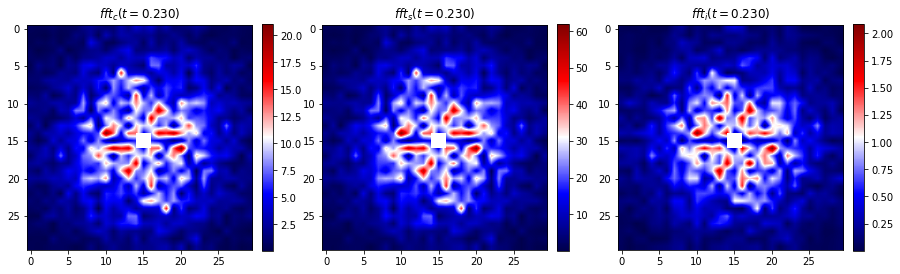

block= 8


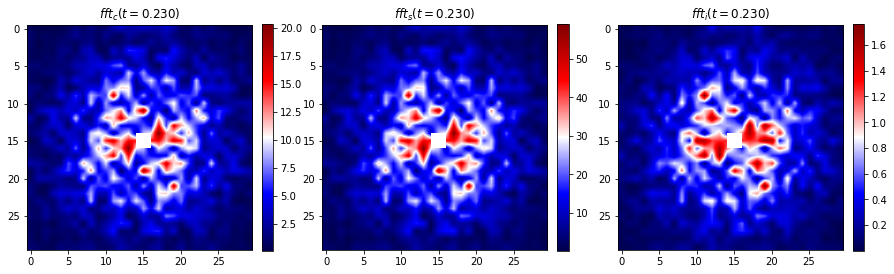

In [8]:
for block in range(1,nb+1):
    t = 0
    print("block=", block)  
    while t <= T:
        t += dt
        field_c, dft_field_c = power_spectrum('c', t, block)
        field_s, dft_field_s = power_spectrum('s', t, block)
        field_i, dft_field_i = power_spectrum('i', t, block)     
    plot_fft(dft_field_c, dft_field_s, dft_field_i, t, save_images, block)


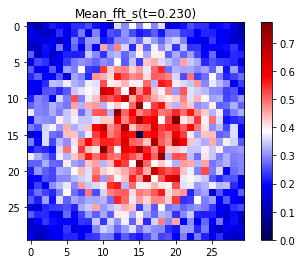

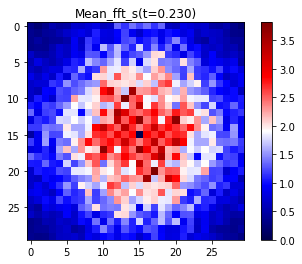

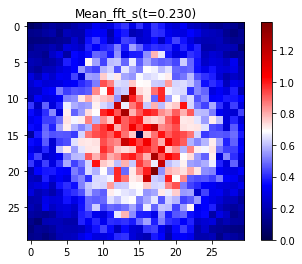

In [9]:
dft_mean('c', T, nb, dt)
dft_mean('s', T, nb, dt)
dft_mean('i', T, nb, dt)